In [57]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M')
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [58]:
df = pd.read_csv('./inv3_emi_data_t345678.csv',
                encoding="utf-8-sig",
                header=0,
                infer_datetime_format=True,
                parse_dates={'datetime':[5]},
                index_col=['datetime']
                )

In [59]:
df['time'] = df.index
df.loc[:,'year'] = pd.Series(df.index.year, df.index)
df.loc[:,'month'] = pd.Series(df.index.month, df.index)
df.loc[:,'day'] = pd.Series(df.index.day, df.index)
df.loc[:,'hour'] = pd.Series(df.index.hour, df.index)
df.loc[:,'dayofweek'] = pd.Series(df.index.dayofweek, df.index)
df.loc[:,'dayname'] = pd.Series(df.index.day_name(), df.index)
df.loc[:,'hourofweek'] = pd.Series((df.hour+24*df.dayofweek), df.index)
df.loc[:,'hourofmonth'] = pd.Series((df.hour+24*(df.day-1)), df.index)
df.loc[:,'Tcell']=pd.Series((df['Ambient temperature(℃)']+df['Irradiance(W/㎡)']/800*(25-20)), df.index)
df.loc[:,'Pm']=pd.Series((2.172*1.303*220*df['Irradiance(W/㎡)']), df.index)
df.loc[:,'Hieu suat']=pd.Series((df['Total input power(kW)']*1000/df['Pm']*100), df.index)
df.loc[:,'date'] = pd.Series(df.index.date, df.index)
df=df[df['Ambient temperature(℃)']>6]
df=df[df['Irradiance(W/㎡)']>300]
df=df[df['Total input power(kW)']>76]
df=df[(df['Inverter status']=='Grid connected')|(df['Inverter status']=='Grid connected : power limited')]
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Site Name,Management Domain,ManageObject_x,Ambient temperature(℃),PV Temperature(℃),Wind speed(m/s),Wind direction(°),Daily irradiation(MJ/㎡),...,day,hour,dayofweek,dayname,hourofweek,hourofmonth,Tcell,Pm,Hieu suat,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-03-04 10:15:00,103,103,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,38.8,1.7,NaN,3.870,...,4,10,4,Friday,106,82,33.537500,292633.994400,28.856866,2022-03-04
2022-03-04 10:20:00,104,104,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.4,41.2,1.4,NaN,4.039,...,4,10,4,Friday,106,82,33.389375,397421.869416,21.566755,2022-03-04
2022-03-04 10:25:00,105,105,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.0,2.4,NaN,4.252,...,4,10,4,Friday,106,82,34.078750,476059.472592,18.550203,2022-03-04
2022-03-04 10:30:00,106,106,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.3,42.9,4.5,NaN,4.197,...,4,10,4,Friday,106,82,34.449375,512981.165928,17.476860,2022-03-04
2022-03-04 10:35:00,107,107,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,44.7,0.8,NaN,4.444,...,4,10,4,Friday,106,82,34.868125,514849.042488,17.537956,2022-03-04
2022-03-04 10:40:00,108,108,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,29.7,45.6,2.0,NaN,4.692,...,4,10,4,Friday,106,82,34.773750,505447.397136,17.563252,2022-03-04
2022-03-04 10:45:00,109,109,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.6,46.5,3.0,NaN,4.942,...,4,10,4,Friday,106,82,35.882500,526243.089504,17.356047,2022-03-04
2022-03-04 10:50:00,110,110,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,31.3,47.2,2.2,NaN,5.194,...,4,10,4,Friday,106,82,36.598125,527799.653304,17.274168,2022-03-04
2022-03-04 10:55:00,111,111,VNM - Đà Nẵng - Nhà Máy,/BCG Energy,1020C0058922/EM001020C0058922,30.7,47.5,1.5,NaN,5.447,...,4,10,4,Friday,106,82,36.038750,531846.719184,17.334318,2022-03-04


In [60]:
df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
df1=df1.reset_index()
df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
df1=df1.reset_index()
df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*df1['Irradiance(W/㎡)']), df1.index)
df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']*1000/df1['Pm']*100), df1.index)
df1=df1[df1['Hieu suat']<25]
print(df1)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df1['date'],
    y=df1['Hieu suat'],
    name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 "))
fig . update_traces (
    showlegend = True 
    )
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

     index  month        date  hour  Total input power(kW)  \
0        1      3  2022-03-04    11              93.462667   
1        2      3  2022-03-19    12              88.786500   
2        4      3  2022-03-20    12              77.717000   
3        5      3  2022-03-21    10              76.596000   
4        8      3  2022-03-22    11              97.829917   
..     ...    ...         ...   ...                    ...   
139    772      8  2022-08-21    11             101.342125   
140    780      8  2022-08-22    12              99.953417   
141    785      8  2022-08-23    11              98.188500   
142    790      8  2022-08-24    11              90.232889   
143    795      8  2022-08-25     9              76.382000   

     Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0                 23.300000       842.800000  28.567500  524748.788256   
1                  7.400000       807.950000  12.449688  503050.288884   
2                  6.300000      

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\3274232712.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [61]:
df1['stt']=df1.index
df_binary = df1[['stt', 'Hieu suat']] 
  
# Taking only the selected two attributes from the dataset 
df_binary.columns = ['stt', 'Hieu suat'] 
  
# Renaming the columns for easier writing of the code 
df_binary.head() 
  
# Displaying only the 1st  rows along with the column names 

,stt,Hieu suat
0,0,17.810935
1,1,17.649627
2,2,14.573429
3,3,17.167315
4,4,17.116614


0.010210566606826954


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\3909986184.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\3909986184.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



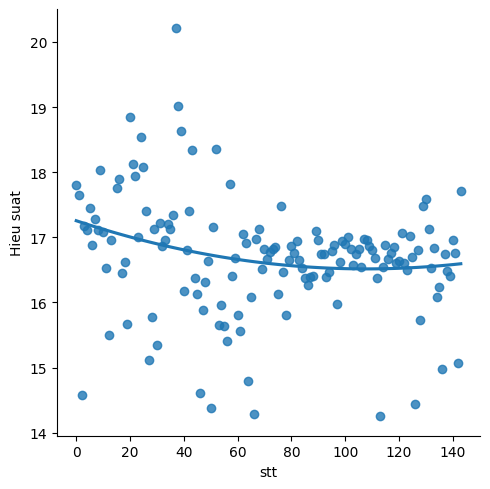

In [62]:
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary, order = 2, ci = None)
# Eliminating NaN or missing input numbers 
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['stt']).reshape(-1, 1) 
y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
  
# Separating the data into independent and dependent variables 
# Converting each dataframe into a numpy array  
# since each dataframe contains only one column 
df_binary.dropna(inplace = True) 
  
# Dropping any rows with Nan values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

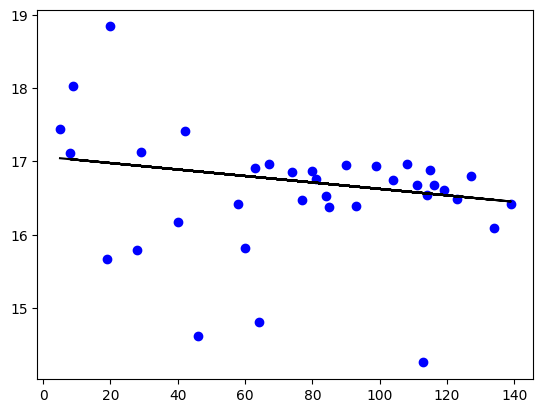

In [63]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

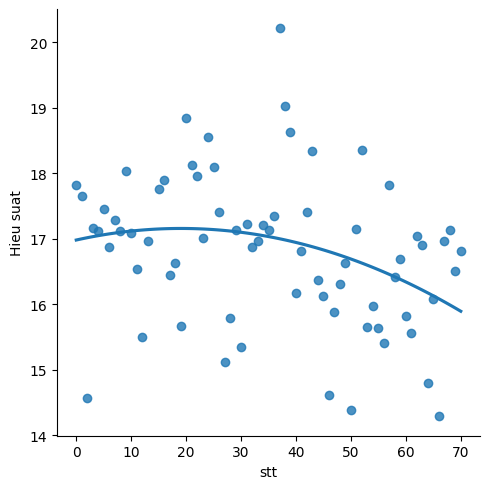

In [64]:
df_binary1 = df_binary[:][:70]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary1, 
                               order = 2, ci = None)

In [65]:
df_binary1.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary1['stt']).reshape(-1, 1) 
y = np.array(df_binary1['Hieu suat']).reshape(-1, 1) 
  
df_binary1.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.08714559014124346


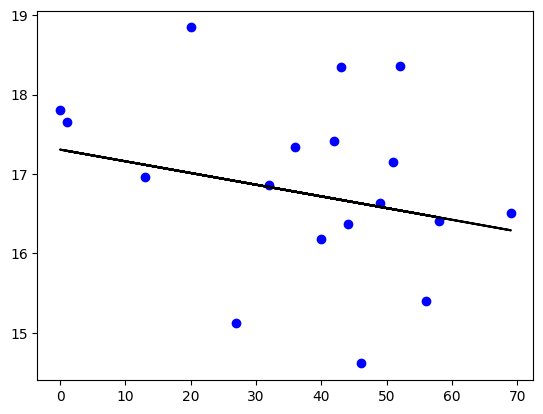

In [66]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

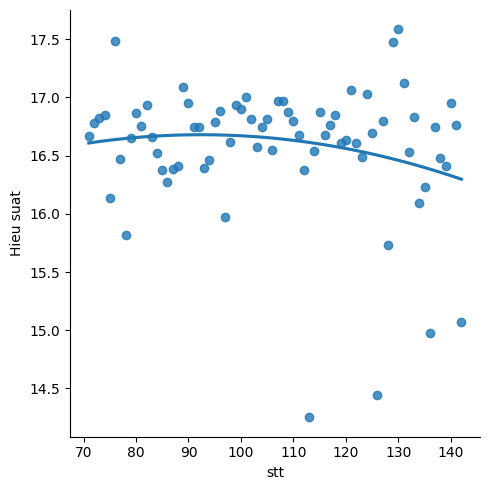

In [67]:
df_binary2 = df_binary[:][70:142]
  
# Selecting the 1st 500 rows of the data 
sns.lmplot(x ="stt", y ="Hieu suat", data = df_binary2, 
                               order = 2, ci = None)

In [68]:
df_binary2.fillna(method ='ffill', inplace = True) 
  
X = np.array(df_binary2['stt']).reshape(-1, 1) 
y = np.array(df_binary2['Hieu suat']).reshape(-1, 1) 
  
df_binary2.dropna(inplace = True) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

-1.139666052696367


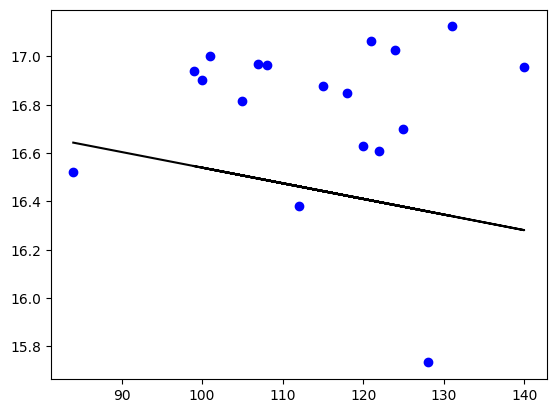

In [69]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
  
plt.show() 

    index  month        date  hour  Total input power(kW)  \
0       1      3  2022-03-04    11              93.462667   
1       2      3  2022-03-19    12              88.786500   
2       4      3  2022-03-20    12              77.717000   
3       5      3  2022-03-21    10              76.596000   
4       8      3  2022-03-22    11              97.829917   
5      15      3  2022-03-23    12             101.482091   
6      20      3  2022-03-24    12             100.042714   
7      25      3  2022-03-25    11             101.795727   
8      31      3  2022-03-26    11              96.617917   
9      35      3  2022-03-28    10              93.059500   
10     42      3  2022-03-29    11              90.687000   
11     48      3  2022-03-30    12             105.001600   

    Ambient temperature(℃)  Irradiance(W/㎡)      Tcell             Pm  \
0                23.300000       842.800000  28.567500  128974.542439   
1                 7.400000       807.950000  12.449688  1148

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



-0.7971652403760232


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



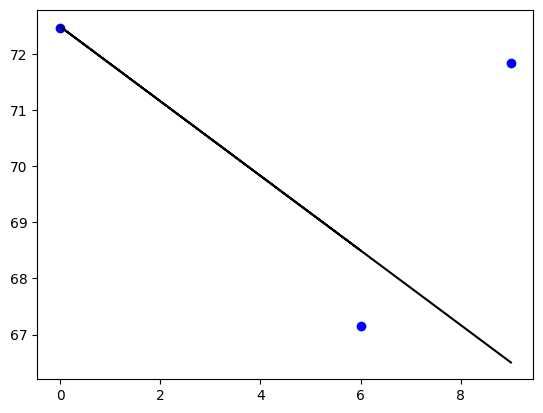

    index  month        date  hour  Total input power(kW)  \
12     54      4  2022-04-03    13             103.873667   
13     55      4  2022-04-04    12              81.079750   
15     60      4  2022-04-06    13             103.841222   
16     65      4  2022-04-07    11             100.793000   
17     71      4  2022-04-08    11              94.580167   
18     77      4  2022-04-09    11              97.643727   
19     82      4  2022-04-10    12              85.185000   
20     86      4  2022-04-11    10              84.339000   
21     90      4  2022-04-12    11              89.125250   
22     93      4  2022-04-13    11              87.904889   
23     98      4  2022-04-14    11              90.510364   
24    103      4  2022-04-15    11              93.878429   
25    109      4  2022-04-16    11              96.646000   
26    117      4  2022-04-17    12             102.579091   
27    123      4  2022-04-18    12             102.330400   
28    129      4  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-0.663950203583447


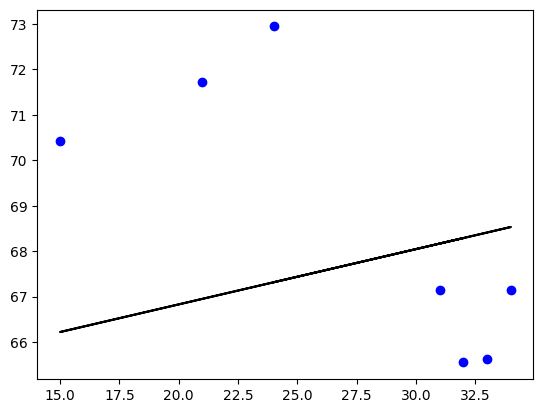

    index  month        date  hour  Total input power(kW)  \
38    181      5  2022-05-01    10              90.944000   
39    182      5  2022-05-02    11              81.189750   
40    184      5  2022-05-05    10              95.149800   
41    191      5  2022-05-06    11             103.001364   
42    197      5  2022-05-07    10             101.262417   
43    202      5  2022-05-08    11              83.186500   
44    203      5  2022-05-09    12              95.223000   
45    209      5  2022-05-10    11             106.584909   
46    214      5  2022-05-11    11              86.699400   
47    221      5  2022-05-12    11              98.697917   
48    226      5  2022-05-13    11             103.383600   
49    236      5  2022-05-14    13              95.861800   
50    238      5  2022-05-15     9              78.495000   
51    241      5  2022-05-16    10             100.099667   
52    246      5  2022-05-17     9             100.188000   
53    251      5  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-1.1573729840234943


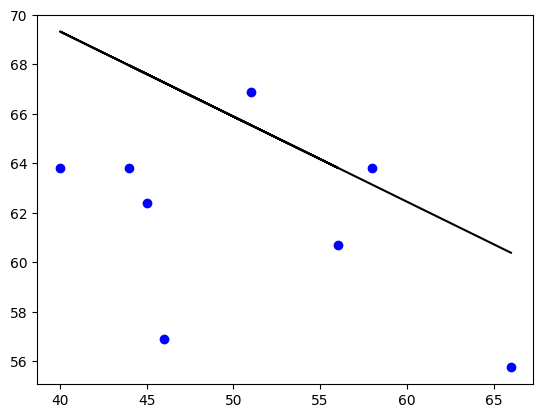

    index  month        date  hour  Total input power(kW)  \
67    333      6  2022-06-01    11             100.240083   
68    340      6  2022-06-02    11              98.030750   
69    347      6  2022-06-03    11              96.499000   
70    354      6  2022-06-04    11             101.751667   
71    363      6  2022-06-05    12              97.560200   
72    368      6  2022-06-06    11              96.537833   
73    374      6  2022-06-07    11             101.565250   
74    381      6  2022-06-08    12              96.748500   
75    388      6  2022-06-09    12             101.662833   
76    393      6  2022-06-10    11              83.589833   
77    397      6  2022-06-11    11              88.238364   
78    404      6  2022-06-12    11              94.368167   
79    410      6  2022-06-13    11              98.414667   
80    415      6  2022-06-14    10              90.309857   
81    420      6  2022-06-15    10              85.012727   
82    428      6  2022-0

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-1.7389750221680385


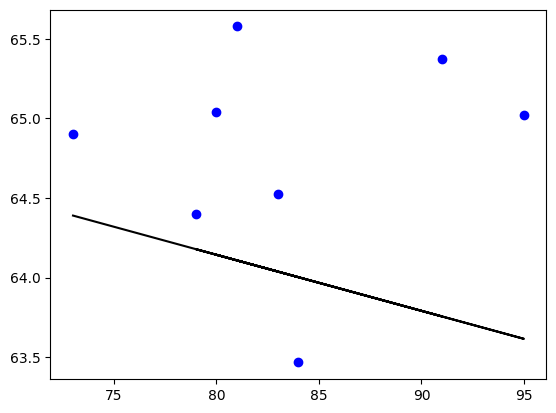

     index  month        date  hour  Total input power(kW)  \
96     514      7  2022-07-03    11              92.139818   
97     519      7  2022-07-04    11              91.714727   
98     525      7  2022-07-05    11             100.209700   
99     531      7  2022-07-06    11              96.262583   
100    536      7  2022-07-07    10              95.480364   
101    540      7  2022-07-08    10              91.037625   
102    545      7  2022-07-09    10              94.821200   
103    551      7  2022-07-11    12             103.508000   
104    557      7  2022-07-12    11             101.252833   
105    566      7  2022-07-13    12             102.865583   
106    573      7  2022-07-14    11              99.421750   
107    580      7  2022-07-15    11             101.139500   
108    586      7  2022-07-16    11              98.847583   
109    592      7  2022-07-17    11              98.310750   
110    598      7  2022-07-18    11              99.804667   
111    6

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



-0.6636720894211534


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



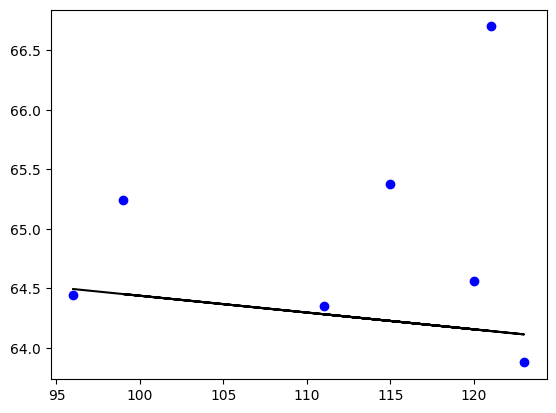

     index  month        date  hour  Total input power(kW)  \
124    685      8  2022-08-01    10              91.713000   
125    693      8  2022-08-02    11             101.649500   
126    699      8  2022-08-03    11             101.762500   
127    706      8  2022-08-04    11             101.415417   
128    713      8  2022-08-05    11              98.024000   
129    716      8  2022-08-06    11              82.614143   
130    718      8  2022-08-10     9              88.907667   
131    723      8  2022-08-12    12              91.091400   
132    728      8  2022-08-13    11              99.883250   
133    734      8  2022-08-14    11             100.351000   
134    740      8  2022-08-15    11              99.818083   
135    747      8  2022-08-16    11              99.167727   
136    754      8  2022-08-17    11              92.442286   
137    761      8  2022-08-18    12             100.896333   
138    768      8  2022-08-19    12              98.783667   
139    7

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4292\1201663089.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-0.13952160806449476


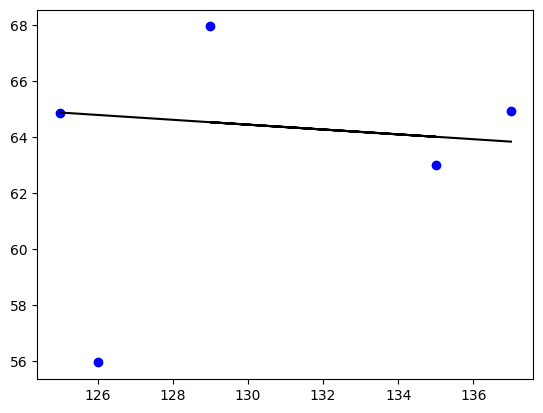

In [70]:
i=3
while i<=8:
    c=str(i)
    df1=df.groupby(['month','date','hour'])['Total input power(kW)','Ambient temperature(℃)','Irradiance(W/㎡)'].mean()
    df1=df1.reset_index()
    df1=df1[df1.groupby(['month','date'])['Irradiance(W/㎡)'].transform(max)==df1['Irradiance(W/㎡)']]
    df1=df1.reset_index()
    df1.loc[:,'Tcell']=pd.Series((df1['Ambient temperature(℃)']+df1['Irradiance(W/㎡)']/800*(25-20)), df1.index)
    df1.loc[:,'Pm']=pd.Series((2.172*1.303*220*2*590*df1['Irradiance(W/㎡)']/1000*(1+0.0045*(df1['Tcell']-25))*20.5/100), df1.index)
    df1.loc[:,'Hieu suat']=pd.Series((df1['Total input power(kW)']*1000/df1['Pm']*100), df1.index)
    df1=df1[df1['Hieu suat']<100]
    df1=df1[df1['month']==i]
    print(df1)
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df1['date'],
        y=df1['Total input power(kW)'],
        name="Sản lượng điện trung bình cao nhất theo khung giờ mỗi ngày inverter 3 tháng "+c))
    fig.add_trace(go.Scatter(
        x=df1['date'],
        y=df1['Hieu suat'],
        name="Hiệu suất trung bình cao nhất theo khung giờ mỗi ngày inverter 3 tháng "+c))
    fig . update_traces (
        showlegend = True 
        )
    fig.update_xaxes(
        rangeslider_visible=True,
    )
    fig.show()
    df1['stt']=df1.index
    df_binary = df1[['stt', 'Hieu suat']] 
    
    # Taking only the selected two attributes from the dataset 
    df_binary.columns = ['stt', 'Hieu suat'] 
    
    # Renaming the columns for easier writing of the code 
    df_binary.head() 
    
    # Displaying only the 1st  rows along with the column names 
    # Eliminating NaN or missing input numbers 
    df_binary.fillna(method ='ffill', inplace = True)
    X = np.array(df_binary['stt']).reshape(-1, 1) 
    y = np.array(df_binary['Hieu suat']).reshape(-1, 1) 
    
    # Separating the data into independent and dependent variables 
    # Converting each dataframe into a numpy array  
    # since each dataframe contains only one column 
    df_binary.dropna(inplace = True) 
    
    # Dropping any rows with Nan values 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
    
    # Splitting the data into training and testing data 
    regr = LinearRegression() 
    
    regr.fit(X_train, y_train) 
    print(regr.score(X_test, y_test))
    y_pred = regr.predict(X_test) 
    plt.scatter(X_test, y_test, color ='b') 
    plt.plot(X_test, y_pred, color ='k') 
    
    plt.show() 
    i=i+1